In [43]:
import os

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("ResumeDataSet.csv")

In [46]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [47]:
df.shape

(962, 2)

In [48]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

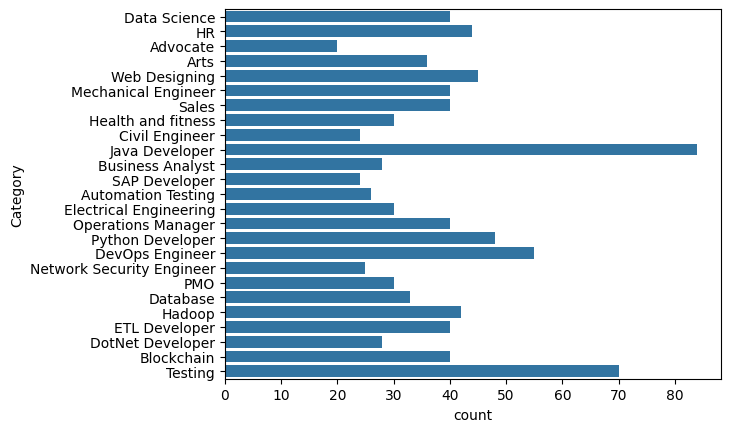

In [49]:
plt.figure()
sns.countplot(df['Category'])
plt.show()

In [50]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()

In [51]:
df['Category'][0]

'Data Science'

In [52]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [53]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def cleanResume(txt):
    cleantxt = re.sub('https\S+', '', txt)
    cleantxt = re.sub(r'@\S+|#\S+', '', cleantxt)
    cleantxt = re.sub(r'[^\w\s]', '', cleantxt)
    
    tokens = word_tokenize(cleantxt)
    
    cleantxt = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(cleantxt)

<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
C:\Users\krish\AppData\Local\Temp\ipykernel_15252\838585221.py:15: SyntaxWarning: invalid escape sequence '\S'
  cleantxt = re.sub('https\S+', '', txt)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [54]:
cleanResume('This is sample sentence https://google.com @gmail.com krishiv activities')

'sample sentence krishiv activity'

In [55]:

df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [56]:

df['Resume'][3]


'skill â r â python â sap hana â tableau â sap hana sql â sap hana pal â m sql â sap lumira â c â linear programming â data modelling â advance analytics â scm analytics â retail analytics âsocial medium analytics â nlp education detail january 2017 january 2018 pgdm business analytics great lake institute management illinois institute technology january 2013 bachelor engineering electronics communication bengaluru karnataka new horizon college engineering bangalore visvesvaraya technological university data science consultant consultant deloitte usi skill detail linear programming exprience 6 month retail exprience 6 month retail marketing exprience 6 month scm exprience 6 month sql exprience less 1 year month deep learning exprience less 1 year month machine learning exprience less 1 year month python exprience less 1 year month r exprience less 1 year monthscompany detail company deloitte usi description project involved analysing historic deal coming insight optimize future deal ro

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['Category']= label_encoder.fit_transform(df['Category'])


In [58]:

df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])


In [60]:
requiredText

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 155873 stored elements and shape (962, 7156)>

In [61]:
df

,Category,Resume
0,6,skill programming language python panda numpy ...
1,6,education detail may 2013 may 2017 uitrgpv dat...
2,6,area interest deep learning control system des...
3,6,skill â r â python â sap hana â tableau â sap ...
4,6,education detail mca ymcaust faridabad haryana...
...,...,...
957,23,computer skill â proficient m office word basi...
958,23,â willingness accept challenge â positive thin...
959,23,personal skill â quick learner â eagerness lea...
960,23,computer skill software knowledge mspower poin...


In [62]:
x=requiredText
y=df['Category']


In [63]:
from sklearn.model_selection import train_test_split

In [64]:

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
best_model.fit(x_train, y_train)
y_pred=best_model.predict(x_test)



In [66]:
accuracy_score(y_test,y_pred)

0.9948186528497409

In [67]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(best_model, open('best_model.pkl', 'wb'))

In [73]:
# Example Resume Input
myresume="""I am a fresh graduate with skills in Java and Spring Boot. I have done several projects using SQL and Microservices."""

In [74]:
clf = pickle.load(open('best_model.pkl', 'rb'))

# Handle empty input
if not myresume.strip():
    print("Input resume is empty. Please provide resume text in variable 'myresume'.")
else:
    cleaned_resume = cleanResume(myresume)
    input_features = tfidf.transform([cleaned_resume])
    prediction_id = clf.predict(input_features)[0]

    # Map category ID to category name
    category_mapping = {
        15: "Java Developer",
        23: "Testing",
        8: "DevOps Engineer",
        20: "Python Developer",
        24: "Web Designing",
        12: "HR",
        13: "Hadoop",
        3: "Blockchain",
        10: "ETL Developer",
        18: "Operations Manager",
        6: "Data Science",
        22: "Sales",
        16: "Mechanical Engineer",
        1: "Arts",
        7: "Database",
        11: "Electrical Engineering",
        14: "Health and fitness",
        19: "PMO",
        4: "Business Analyst",
        9: "DotNet Developer",
        2: "Automation Testing",
        17: "Network Security Engineer",
        21: "SAP Developer",
        5: "Civil Engineer",
        0: "Advocate",
    }

    category_name = category_mapping.get(prediction_id, "Unknown")

    print("Predicted Category:", category_name)
    print(prediction_id)

Predicted Category: Java Developer
15


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

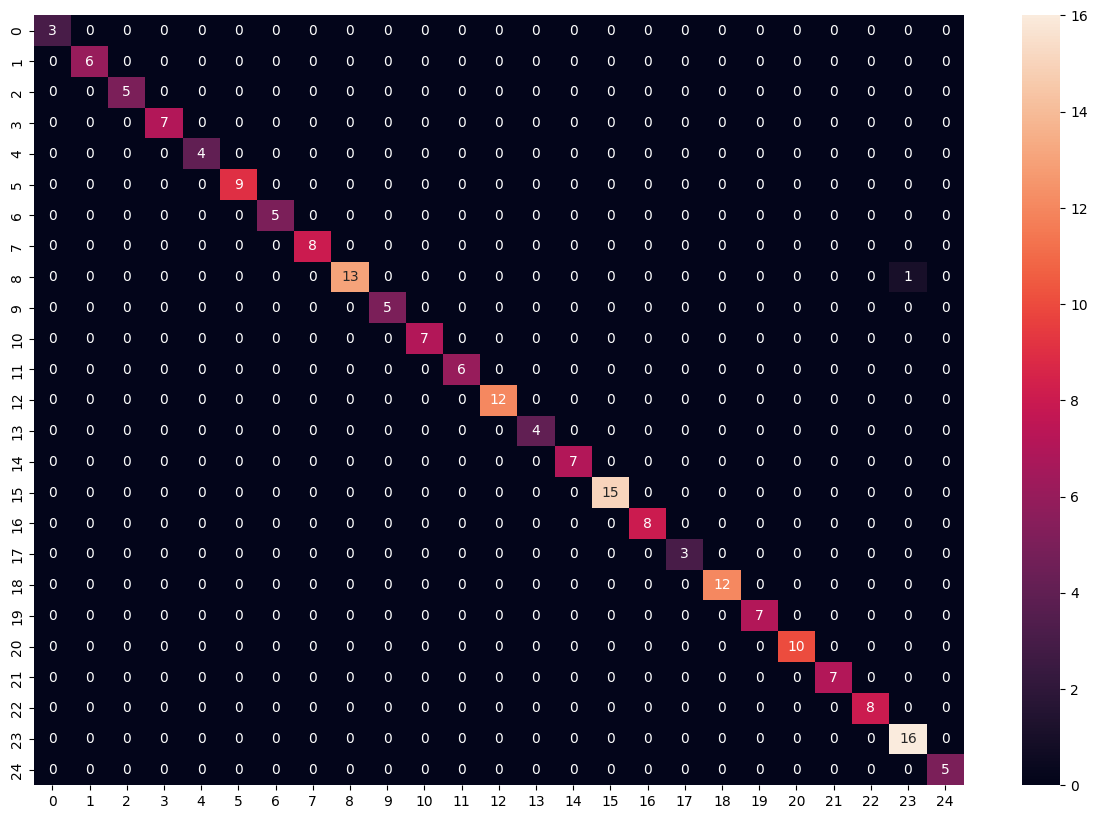

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()